# Reinforcement Learning: Grid World Problem using Q-Learning

## Introduction to the Problem

Imagine a grid of size n x m in which a robot has to traverse from a set start point to a set end point. However within the grid there are "holes" which the robot should avoid falling into. The aim is for the robot to learn the optimal path.

This aim can be achieved by implementing a reinforcement learning algorithm. The method chosen and contained is this notebook is a Q-learning method


## Creating the environment

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

# 5 x 5 grid 
n_x = 5
n_y = 5

environment = np.zeros((n_y, n_x))

initial_state = (0,0)

loc_positive_reward = (4,4)
loc_negative_reward = [(2,2),(2,3),(3,2),(3,3)]

# Assign each cell of grid a reward
def rewards(state):
    state_y, state_x = state
    if state == loc_positive_reward:
        reward = 100
    elif state in loc_negative_reward:
        reward = -30
    else:
        reward = -1
    return reward

# Visual check to ensure environment has been set up correctly
rewards_field = np.zeros_like(environment)

for i in range(0,n_y):
    for j in range(0, n_x):
        rewards_field[i,j] = rewards((i,j))

print(rewards_field)

[[ -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1. -30. -30.  -1.]
 [ -1.  -1. -30. -30.  -1.]
 [ -1.  -1.  -1.  -1. 100.]]


Each state within the grid world environment is assigned a reward of -1. The terminal state is assigned a reward of 100 and the "holes" which should be avoided as assinged a value of -30.
It should be noted that the locations of the start, end and hole states can be changed as well as the overall size of the enviroment.

It is also important to map each state with a state index

In [13]:
# Assigning index 0 to 24 to each of the cell on the grid
def map_state_to_index(state, n_x):
    state_y, state_x = state
    return state_y * n_x + state_x

## Actions

The robot has four actions it can take at each state. Up Down Left Right. However at states which lie upon a boundary the robot will be limited to only a few of these actions

In [14]:
# Define actions that agent (robot) can take

actions = {0: (-1,0), # up
           1: (1,0), # down
           2: (0,-1), # left
           3: (0,1), #right
           }

n_actions = 4 # used when generating the Q table

## Q Learning 
### Initialising the Q Table

In order for the agent to begin learning a Q table need to be intialised first. In this example a Q table is generated filled with random values between 100 to 200. This ensures that primarly the agent is learning randomly and priortising exploration over explotation in the early stages of learning.

In [15]:
# Q table 
Q_table = np.empty((n_y * n_x, n_actions))

# Create a Q table with random values between 100 and 200

for j in range(n_x*n_y):
    for i in range(n_actions):
        val = random.randint(100,200)
        Q_table[j][i] = val

### Key Parameters
In order to implement a Q Learning algorithm a few key paramenters need to be set.


In [16]:
beta = 0.7 # learning rate
gamma = 0.9 # discount factor
epsilon = 1.0 # probability of taking a random non optimal action
epsilon_decay = 0.999
min_epsilon = 0.01
num_trials = 300 # number of trials to train robot

### Q Learning Algorithm


In [17]:
# Empty array to store reward values after each trial
store_tot_reward = np.array([])
store_steps_taken = np.array([])

for trial in range(num_trials):

    #Set initial conditions
    state = initial_state
    total_reward = 0
    steps_taken = 0

    while state != loc_positive_reward:

        state_index = map_state_to_index(state, n_x)

        if random.random() < epsilon:
            action = random.choice(list(actions.keys()))
        else:
            action = np.argmax(Q_table[state_index])


        move = actions[action]
        next_state = (state[0] + move[0],state[1] + move[1])

        next_state = (
            max(0, min(n_y - 1, next_state[0])),
            max(0, min(n_x - 1, next_state[1]))
        )

        reward = rewards(next_state)


        total_reward = total_reward + reward

        next_state_index = map_state_to_index(next_state, n_x)

        Q_observed = reward + gamma * np.max(Q_table[next_state_index]) # Bellman Equation where gamma is the discount factor
        tde = Q_observed - Q_table[state_index][action] # Temporal difference error
        Q_table[state_index][action] = Q_table[state_index][action] + beta * tde # Update rule

        # Use an epsilon greedy function where epsilon decays with each trial
        epsilon = max(min_epsilon , epsilon * epsilon_decay)

        state = next_state

        steps_taken = steps_taken + 1

    store_tot_reward = np.append(store_tot_reward,total_reward) 
    store_steps_taken = np.append(store_steps_taken,steps_taken)


## Visulisation of Results

The two graphs below show the total reward and steps taken plotted against the number of trials.


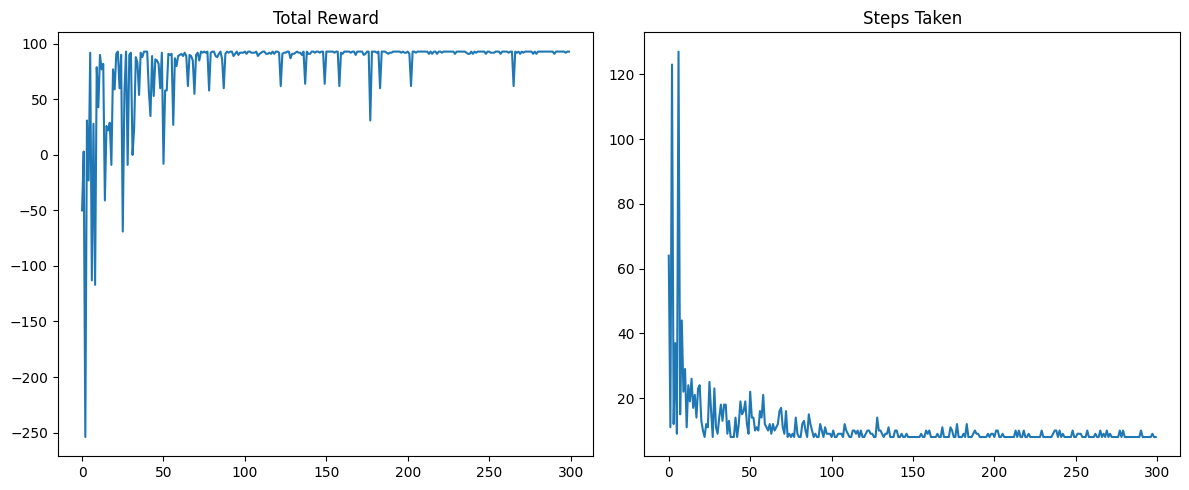

[[111.34870593 124.83189611 111.34870599 124.83183078]
 [119.04186919 139.81321546  98.17602759 131.23015616]
 [118.00318452 156.18302092 104.10265117 123.60148831]
 [133.979903   160.33808264 127.58227539 174.66863674]
 [159.59842721 195.50478117 143.97768331 163.23328656]
 [111.34870442 139.8132179  124.83189601 139.81318215]
 [123.34702765 153.37651864 123.53221957 156.45913096]
 [130.68360502 116.2798771  139.79964702 174.95459   ]
 [154.76578864 163.95671217 156.36064445 195.5051    ]
 [174.90230432 218.339      174.64205133 189.22587756]
 [124.83188698 156.459131   139.81321366 156.44197679]
 [135.01758132 174.95398359 139.2628538  117.79779396]
 [129.55542554 166.25185357 148.750701   130.67853   ]
 [138.6422657  172.93180107 114.49630028 218.30088192]
 [194.79862305 243.71       164.95356959 217.64024055]
 [139.81312936 174.95459    156.43065513 174.95458966]
 [155.38898445 195.5051     149.6502006  165.53238968]
 [125.17545396 218.33899938 161.91978469 188.81263126]
 [161.9083

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot of total reward against the number of trials
ax1.plot(store_tot_reward)
ax1.set_title('Total Reward')

# Plot of steps taken against the number of trials
ax2.plot(store_steps_taken)
ax2.set_title('Steps Taken')

plt.tight_layout()
plt.savefig('Results.png')
plt.show()


print(Q_table)

#print(store_tot_reward)
#print(store_steps_taken)